In [1]:
using TimeData
using Econometrics
using NLopt

In [16]:
loadPlotting()

wstHist (generic function with 4 methods)

In [2]:
normedPrices = readTimedata("../market_risk_data/processed_data/normedPrices.csv")

,idx,_GSPC,MMM,ABT,ABBV
1,1990-01-03,0.0,0.0,0.0,NA
2,1990-01-04,-0.008650297911901639,0.007651134236042356,-0.0018016648438040628,NA
3,1990-01-05,-0.018454438989934374,-0.009259350528026289,-0.01267020071048397,NA
4,1990-01-08,-0.013950126914782146,0.01675592581252605,-0.007557074239927575,NA
5,1990-01-09,-0.025806833041793098,0.01675592581252605,-0.011207289652892305,NA
6,1990-01-10,-0.03243592199638723,0.010695251884261125,-0.02408694876058537,NA
7,1990-01-11,-0.028929362283379056,0.019772494768387272,-0.01487036905069139,NA
8,1990-01-12,-0.05391397565547962,-0.01392137636749391,-0.035259429861694724,NA
9,1990-01-15,-0.06257073877122821,-0.017041478354329342,-0.048454705496865924,NA
10,1990-01-16,-0.051504598546947555,-0.004618958355772307,-0.037135180672783985,NA


In [20]:
nObs, nAss = size(normedPrices)

(6437,494)

In [40]:
function garchLLH(params, data)
    ## negative log-likelihood of GARCH(1,1)
    µ, ĸ, beta, alpha, sigma0 = params
    
    nObs = length(data)
    
    ## normalize data
    centered = data - µ
    
    ## get sigma series
    sigmas = Array(Float64, nObs)
    sigmas[1] = sigma0
    for ii=2:nObs
        sigmas[ii] = sqrt(ĸ + beta*sigmas[ii-1]^2 + alpha*centered[ii-1]^2)
    end
    
    nllh = sum(0.5*log(sigmas.^2*2*pi) + 0.5*(centered.^2./sigmas.^2))
end


function garchFit(tm::Timematr)
    nObs, nAss = size(tm)
    if nAss > 1
        error("garch momentarily is only allowed for single asset")
    end
    
    opt = Opt(:LN_COBYLA, 5)
    
    function objFun(x::Vector, grad::Vector)
        ## objective function calculating portfolio variance
        if length(grad) > 0
            ## no partial derivative given
        end
        
        ## calculate portfolio variance
        nllh = garchLLH(x, core(tm))
        return nllh
    end
    
    min_objective!(opt, objFun)
    xtol_rel!(opt, 1e-2)
    
    ## inequality constraints
    ineqConstraint(params, g) = params[3] + params[4] - 1
    inequality_constraint!(opt, ineqConstraint, 1e-9)
    
    lower_bounds!(opt, [-Inf, 0, 0, 0, 0])
    upper_bounds!(opt, [Inf, Inf, Inf, Inf, Inf])
    
    sigma = sqrt(var(core(tm)))
    initVal = [0, sigma, 0, 0, sigma]
    (minf, minx, ret) = optimize(opt, initVal)
    
    ## get associated sigma series
    µ, ĸ, beta, alpha, sigma0 = minx
    
    ## normalize data
    centered = core(tm) - µ
    
    ## get sigma series
    sigmas = Array(Float64, nObs)
    sigmas[1] = sigma0
    for ii=2:nObs
        sigmas[ii] = sqrt(ĸ + beta*sigmas[ii-1]^2 + alpha*centered[ii]^2)
    end
    
    return (sigmas, minx)
end

garchFit (generic function with 2 methods)

In [41]:
logRets = price2ret(normedPrices, log=true).*100

,idx,_GSPC,MMM,ABT,ABBV
1,1990-01-04,-0.8650297911901639,0.7651134236042356,-0.18016648438040628,NA
2,1990-01-05,-0.9804141078032735,-1.6910484764068645,-1.0868535866679907,NA
3,1990-01-08,0.4504312075152228,2.601527634055234,0.5113126470556395,NA
4,1990-01-09,-1.1856706127010952,0.0,-0.365021541296473,NA
5,1990-01-10,-0.6629088954594131,-0.6060673928264926,-1.2879659107693064,NA
6,1990-01-11,0.35065597130081727,0.9077242884126147,0.921657970989398,NA
7,1990-01-12,-2.498461337210056,-3.369387113588118,-2.0389060811003334,NA
8,1990-01-15,-0.8656763115748589,-0.3120101986835433,-1.31952756351712,NA
9,1990-01-16,1.1066140224280652,1.2422519998557036,1.131952482408194,NA
10,1990-01-17,-0.9879918247821529,0.15419576618294073,-1.131952482408194,NA


In [42]:
function rmNAs(tn::Timenum)
    if size(tn, 2) > 1
        error("NA removal only defined for single column Timenums")
    end
    inds = !isna(tn.vals[:, 1])
    return convert(Timematr, tn[inds, 1])
end

rmNAs (generic function with 1 method)

In [43]:
function garchFit(tn::Timenum)
    allSigmas = DataFrame()
    params = DataFrame()
    
    nObs, nAss = size(tn)
    
    for ii=1:nAss
        println(ii)
        nam = names(tn)[ii]
        
        valsOnly = rmNAs(tn[:, ii])
        gFit = garchFit(valsOnly)
        
        sigmas = DataArray(Float64, nObs)
        sigmas[!isna(tn.vals[:, ii])] = gFit[1]
        
        allSigmas[nam] = sigmas
        params[nam] = gFit[2]
    end
    return Timenum(allSigmas, idx(tn)), params
end
        

garchFit (generic function with 2 methods)

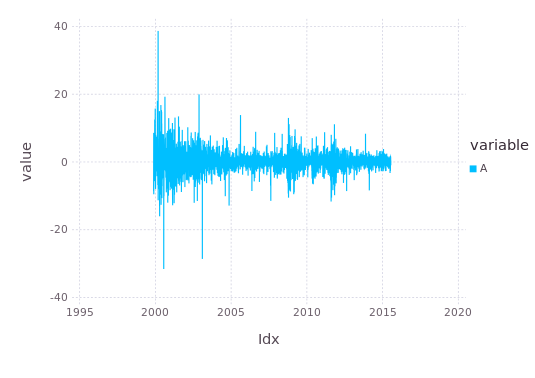

In [37]:
gdfPlot(logRets[:, 13])

In [46]:
@time sigs, pars = garchFit(logRets)
sigs

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


,idx,_GSPC,MMM,ABT,ABBV
1,1990-01-04,1.2266165662680246,1.2986487027448765,1.8175875822377903,NA
2,1990-01-05,1.1887146376211086,1.4201158795565638,1.7067596768213895,NA
3,1990-01-08,1.0847500705176705,1.6767373192102817,1.5543252280057775,NA
4,1990-01-09,1.1148424958712195,1.4996802509688696,1.4365298055551614,NA
5,1990-01-10,1.051668807004952,1.395086728144752,1.4642508038123077,NA
6,1990-01-11,0.9609278291801027,1.3367038851886366,1.4085363426047584,NA
7,1990-01-12,1.4026417167877405,1.889761512930442,1.6141377488279312,NA
8,1990-01-15,1.3166404611237046,1.6686456251439614,1.5940783026200636,NA
9,1990-01-16,1.2675995248372356,1.570593657825807,1.5307825666453074,NA
10,1990-01-17,1.22305562452229,1.4203828331702217,1.5036212357259116,NA


order of parameters: µ, ĸ, beta, alpha, sigma0

In [47]:
pars

,_GSPC,MMM,ABT,ABBV,ACE,ACN,ADBE,ADT,AES,AET,AFL,AMG,A,GAS,APD,ARG,AKAM,AA,ALXN,ATI,ALLE,AGN,ADS,ALL,ALTR,MO,AMZN,AEE,AEP,AXP,AIG,AMT,AMP,ABC,AME,AMGN,APH,APC,ADI,AON,APA,AIV,AAPL,AMAT,ADM,AIZ,T,ADSK,ADP,AN,AZO,AVGO,AVB,AVY,AVP,BHI,BLL,BAC,BK,BCR,BAX,BBT,BDX,BBBY,BBY,BIIB,BLK,HRB,BA,BWA,BXP,BSX,BMY,BRCM,CHRW,CA,CVC,COG,CAM,CPB,COF,CAH,KMX,CCL,CAT,CBG,CBS,CELG,CNP,CTL,CERN,CF,SCHW,CHK,CVX,CMG,CB,CI,XEC,CINF,CTAS,CSCO,C,CTXS,CLX,CME,CMS,COH,KO,CCE,CTSH,CL,CMCSA,CMA,CSC,CAG,COP,CNX,ED,STZ,GLW,COST,CCI,CSX,CMI,CVS,DHI,DHR,DRI,DVA,DE,DLPH,DAL,DNR,XRAY,DVN,DO,DTV,DFS,DISCA,DISCK,DG,DLTR,D,DOV,DOW,DPS,DTE,DD,DUK,DNB,ETFC,EMN,ETN,EBAY,ECL,EIX,EW,EA,EMC,EMR,ESV,ETR,EOG,EQT,EFX,EQR,ESS,EL,EXC,EXPE,EXPD,ESRX,XOM,FFIV,FB,FDO,FAST,FDX,FIS,FITB,FSLR,FE,FISV,FLIR,FLS,FLR,FMC,FTI,F,FOSL,BEN,FCX,FTR,GME,GPS,GRMN,GD,GE,GGP,GIS,GM,GPC,GNW,GILD,GS,GT,GOOGL,GOOG,GWW,HAL,HOG,HAR,HRS,HIG,HAS,HCP,HCN,HP,HES,HPQ,HD,HON,HRL,HSP,HST,HCBK,HUM,HBAN,ITW,IR,TEG,INTC,ICE,IBM,IP,IPG,IFF,INTU,ISRG,IVZ,IRM,JEC,JNJ,JCI,JOY,JPM,JNPR,KSU,K,KEY,GMCR,KMB,KIM,KMI,KLAC,KSS,KRFT,KR,LB,LLL,LH,LRCX,LM,LEG,LEN,LVLT,LUK,LLY,LNC,LLTC,LMT,L,LO,LOW,LYB,MTB,MAC,M,MNK,MRO,MPC,MAR,MMC,MAS,MA,MAT,MKC,MCD,MHFI,MCK,MJN,MWV,MDT,MRK,MET,KORS,MCHP,MU,MSFT,MHK,TAP,MDLZ,MON,MNST,MCO,MS,MOS,MSI,MUR,MYL,NBR,NDAQ,NOV,NAVI,NTAP,NFLX,NWL,NFX,NEM,NWSA,NEE,NLSN,NKE,NI,NE,NBL,JWN,NSC,NTRS,NOC,NRG,NUE,NVDA,ORLY,OXY,OMC,OKE,ORCL,OI,PCG,PCAR,PLL,PH,PDCO,PAYX,PNR,PBCT,POM,PEP,PKI,PRGO,PFE,PM,PSX,PNW,PXD,PBI,PCL,PNC,RL,PPG,PPL,PX,PCP,PCLN,PFG,PG,PGR,PLD,PRU,PEG,PSA,PHM,PVH,QEP,PWR,QCOM,DGX,RRC,RTN,RHT,REGN,RF,RSG,RAI,RHI,ROK,COL,ROP,ROST,RCL,R,CRM,SNDK,SCG,SLB,SNI,STX,SEE,SRE,SHW,SIAL,SPG,SJM,SNA,SO,LUV,SWN,SE,STJ,SWK,SPLS,SBUX,HOT,STT,SRCL,SYK,STI,SYMC,SYY,TROW,TGT,TEL,TE,THC,TDC,TSO,TXN,TXT,HSY,TRV,TMO,TIF,TWX,TWC,TJX,TMK,TSS,TSCO,RIG,TRIP,FOXA,TSN,TYC,USB,UA,UNP,UNH,UPS,MLM,URI,UTX,UHS,UNM,URBN,VFC,VLO,VAR,VTR,VRSN,VZ,VRTX,VIAB,V,VNO,VMC,WMT,WBA,DIS,WM,WAT,ANTM,WFC,WDC,WU,WY,WHR,WFM,WMB,WIN,WEC,WYN,WYNN,XEL,XRX,XLNX,XL,XYL,YHOO,YUM,ZMH,ZION,ZTS
1,0.04411528935825243,0.06476350136904795,0.06224168751372421,0.11650283713164651,0.07458795652578658,0.09242521173005463,0.07852118981219847,-0.0027861286368610115,0.07281529764484357,0.1026445127445563,0.085233637084336,0.17475165917007185,0.10337617909901728,0.045141808269986775,0.027628319914792376,0.1026923391419159,0.1633686302739504,0.04125985709182878,0.06981733029895416,0.0818733908882244,0.0596386129068511,0.11733458526781419,0.17225061014139972,0.08189359994858347,0.1322853931803824,0.09646858908062148,0.24255005537195368,0.07106282021119482,0.04544276449255392,0.07166626808135393,0.12978512069172768,0.010995529846057924,0.10367443276623699,0.10814391882391601,0.054196146182704005,0.08081573060497677,0.1530115011250147,0.04193601191881105,0.05228486141673176,0.06198481616595084,0.06508077804637823,0.07674103006061356,0.11732265084045679,0.10395741162576874,0.06537655378092268,0.07706164031854187,0.06796824903173311,0.10736559330894067,0.05634012064911925,0.14692731568685843,0.09935505551621196,0.16879073983555945,0.04961323210060613,0.06823829954417379,0.055029421991251645,0.06033449253628292,0.05160438221364204,0.07981279701151471,0.07603149764071476,0.04648201793895414,0.07773968064248242,0.11209066099477356,0.05385501531374872,0.09752502691141998,0.014579224097433698,0.06332479588107309,0.10182992123427656,0.08107846181652631,0.05694589629910064,0.09416715496947137,0.09435732581593544,0.055247831096305974,0.0631473610406923,0.08974050634866666,0.060999047656671024,0.044555687006890124,0.059016455567964296,0.05383422339183724,0.1311782796373036,0.06452386415053947,0.16444022655216287,0.049813025966530665,0.0977330587738039,0.15040862626293594,0.07873033087894134,0.13868130504283419,0.10671509031933461,0.11245843214085056,0.08710635439181581,0.09037238682701873,0.11598621386349012,0.1815577043902289,0.08878720070623812,0.1425650175813123,0.05936080862407506,0.11824831616536666,0.045067993731153166,0.1452589720620523,0.15661589033220585,0.067894

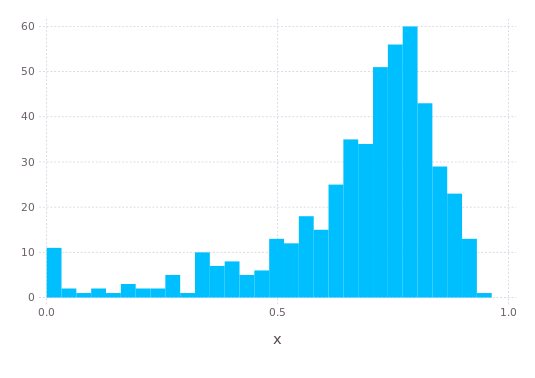

In [49]:
betas = Array(Float64, nAss)
for ii=1:nAss
    betas[ii] = pars[3, ii]
end

Gadfly.plot(x=betas, Gadfly.Geom.histogram(bincount=30))

In [51]:
inds = betas .< 0.2
names(logRets)[inds]

20-element Array{Symbol,1}:
 :ABBV
 :ADT 
 :AVGO
 :DG  
 :FB  
 :GM  
 :HSP 
 :KRFT
 :MNK 
 :KORS
 :NAVI
 :NFLX
 :NWSA
 :PRGO
 :PSX 
 :TDC 
 :TRIP
 :VRTX
 :XYL 
 :ZTS 

In [60]:
logRets[end,1:2]

,idx,_GSPC,MMM
1,2015-07-20,0.07709362861350044,NA


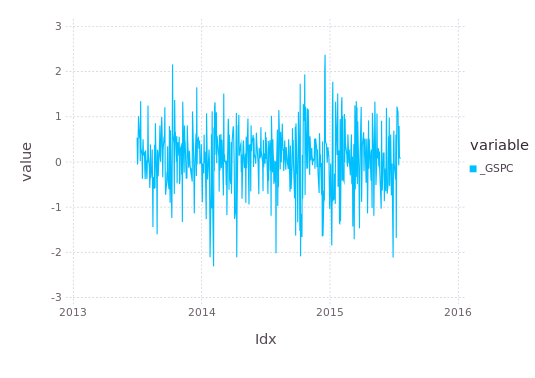

In [64]:
gdfPlot(logRets[Date(2013,7,1):Date(2015,7,20), :_GSPC])

1


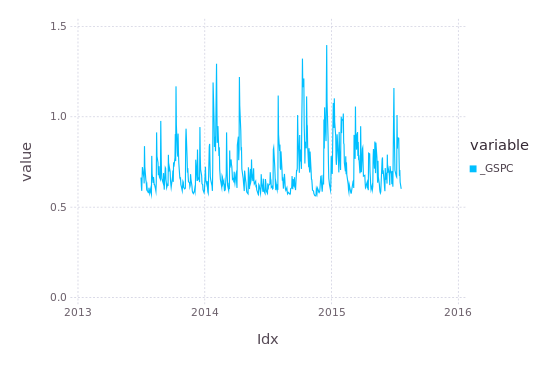

In [62]:
kk = garchFit(logRets[Date(2013,7,1):Date(2015,7,20), :_GSPC])
gdfPlot(kk[1])

In [63]:
kk[2]

,_GSPC
1,0.06592230423294704
2,0.15444920965157993
3,0.5084258276986287
4,0.21008922976401584
5,0.6639412656137458


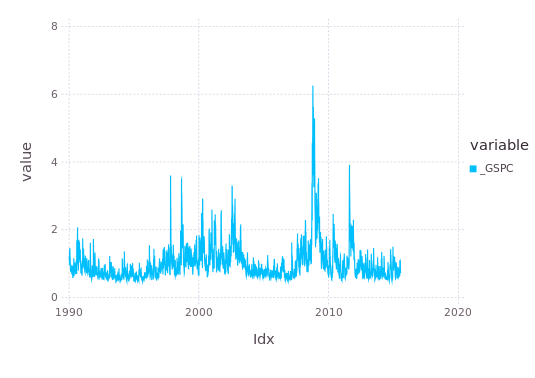

In [59]:
gdfPlot(sigs[:_GSPC])

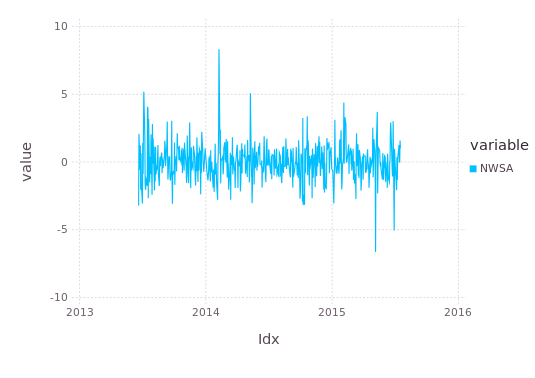

In [56]:
gdfPlot(logRets[:NWSA])

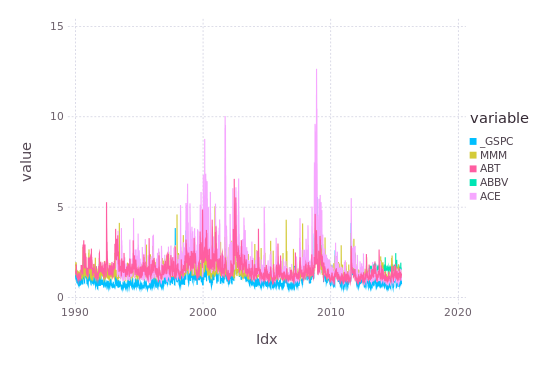

In [29]:
gdfPlot(sigs)

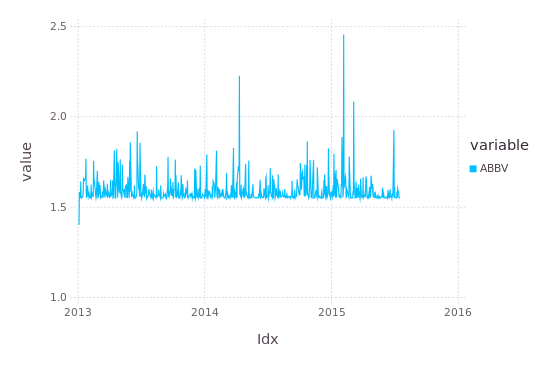

In [30]:
gdfPlot(sigs[:ABBV])


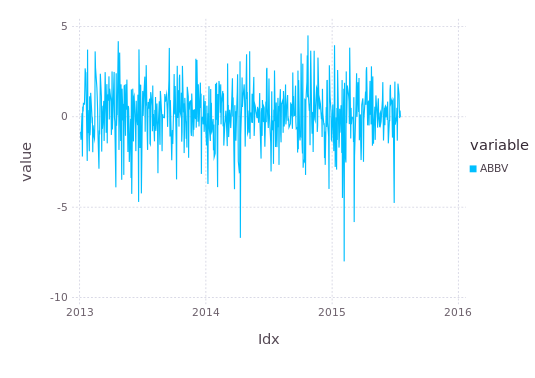

In [31]:
gdfPlot(logRets[:ABBV])

In [32]:
sum(!isna(logRets.vals[:ABBV]))

639